# Regression Diagonstics


So you estimated an effect $\hat{\beta}_1$, great! Now, how can I tell if my model fit the data well. We have learned one way, residuals, but now we are going to take a deeper dive into how to diagnose a regression model. 


Remember the LINE assumptions:

Linear 
Homoscedastic 
Independence
Normality




### What do residuals look like when we violate the linear assumption?

Let's generate some regression data under an y= 2 + 3 x^2 relationship. 

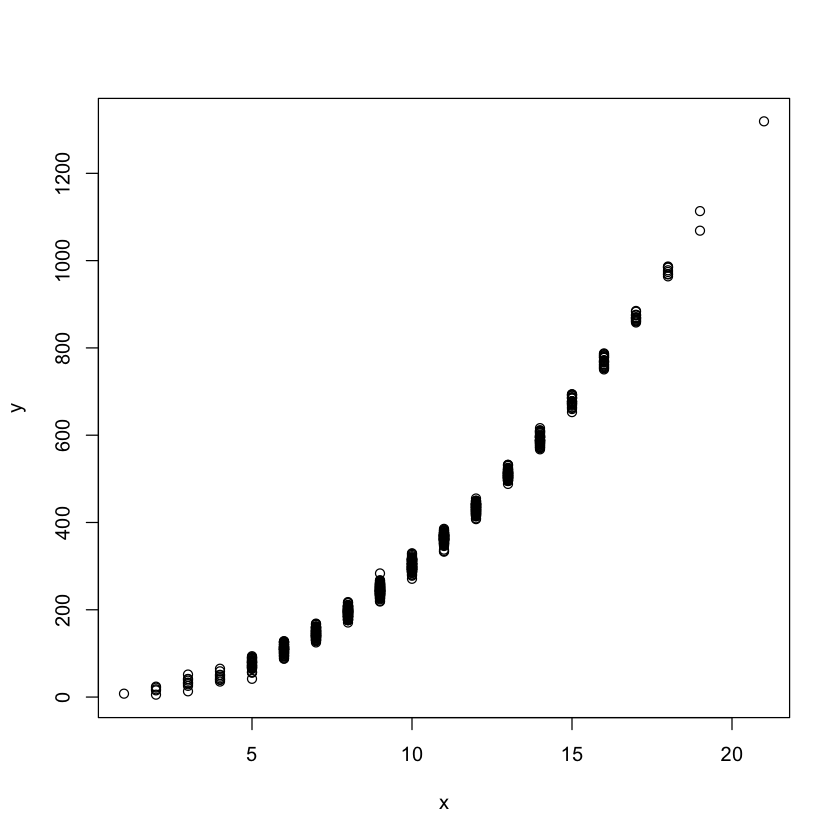

In [3]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 1:1000){
    y[i] <- rnorm(1,2 + 3*x[i]^2,10)
}
plot(x,y)

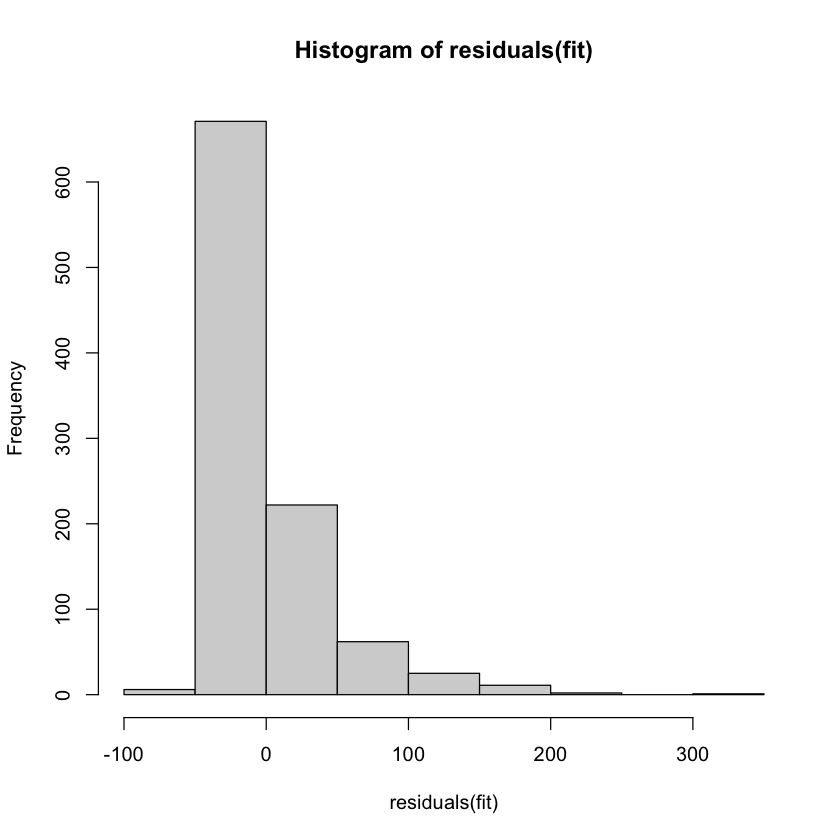

In [5]:
fit <- lm(y~x)
hist(residuals(fit))

### What do residuals look like when we violate the Homoscedastic assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing variance.



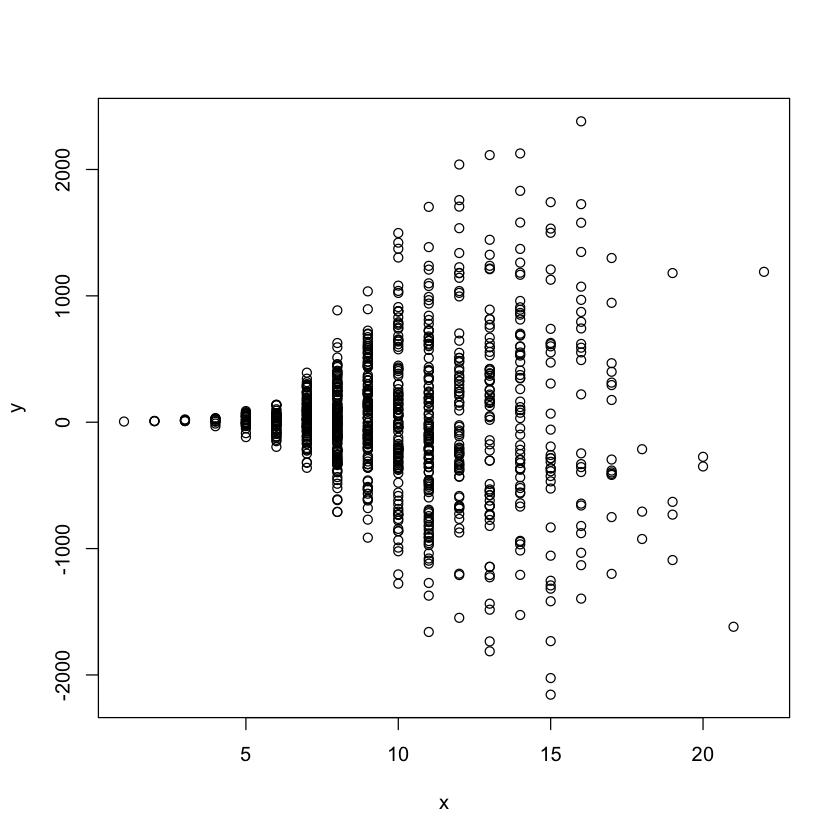

In [18]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 1:1000){
    y[i] <- rnorm(1,2 + 3*x[i],i)
}
plot(x,y)

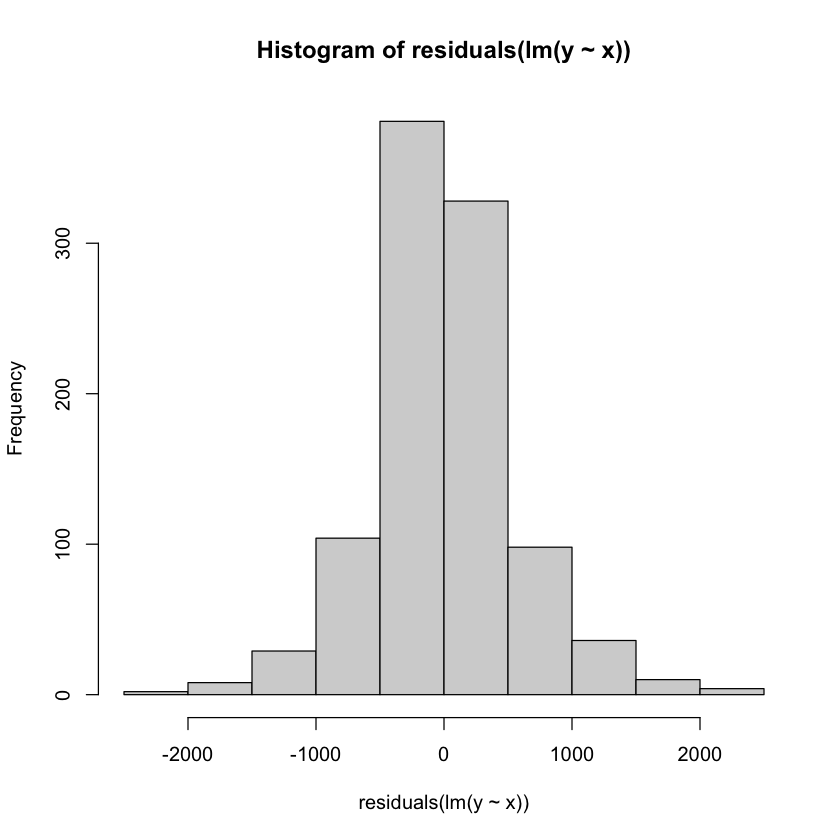

In [19]:
hist(residuals(lm(y~x)))


In [20]:
sd(residuals(lm(y~x)))

[1] 560.0611

### What do residuals look like when we violate the Independence assumption?

Let's generate some regression data under an $ y_i= 2 + .5 y_{i-1}$ relationship where y depends on the previous y.


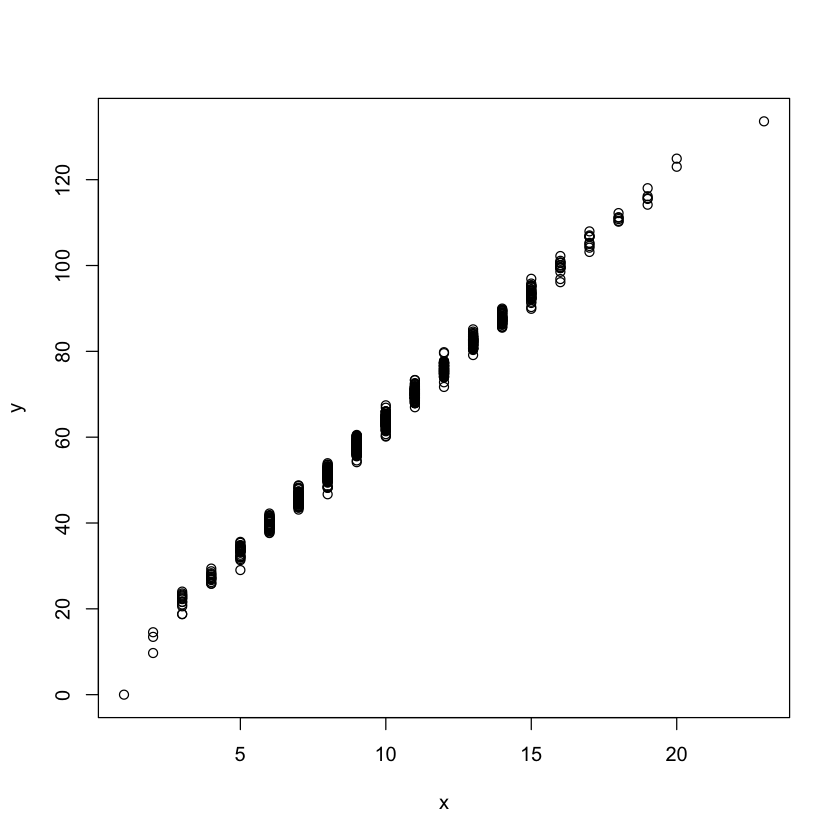

In [27]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 2:1000){
    y[i] <- rnorm(1,2 + .5*y[i-1] + 3*x[i],1)
}

plot(x,y)

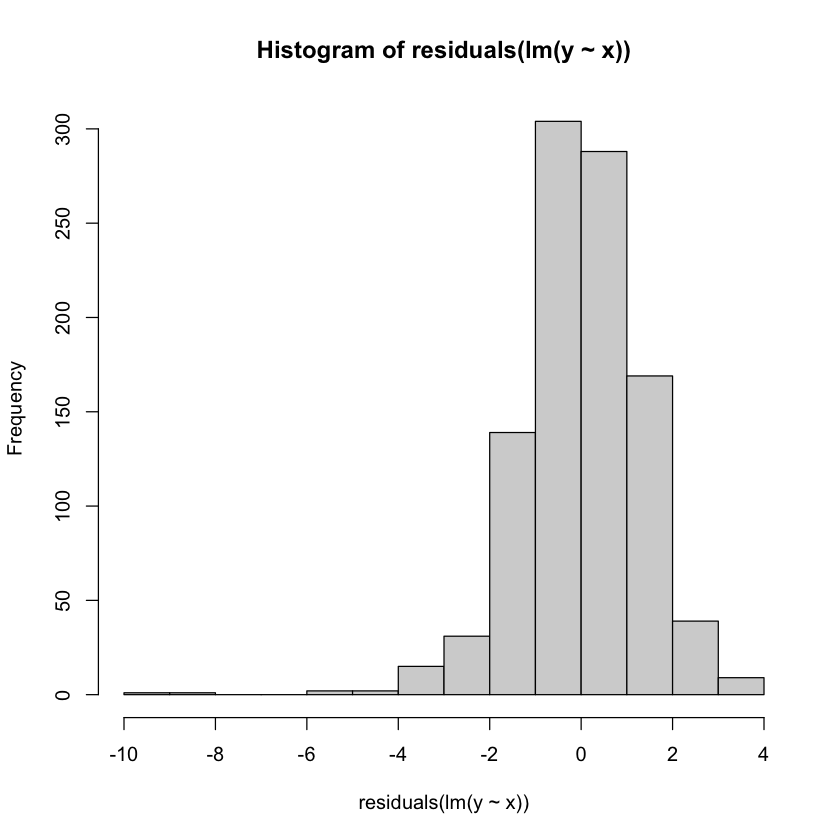

In [28]:
hist(residuals(lm(y~x)))


### What do residuals look like when we violate the normal assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing a non-normal distribution.




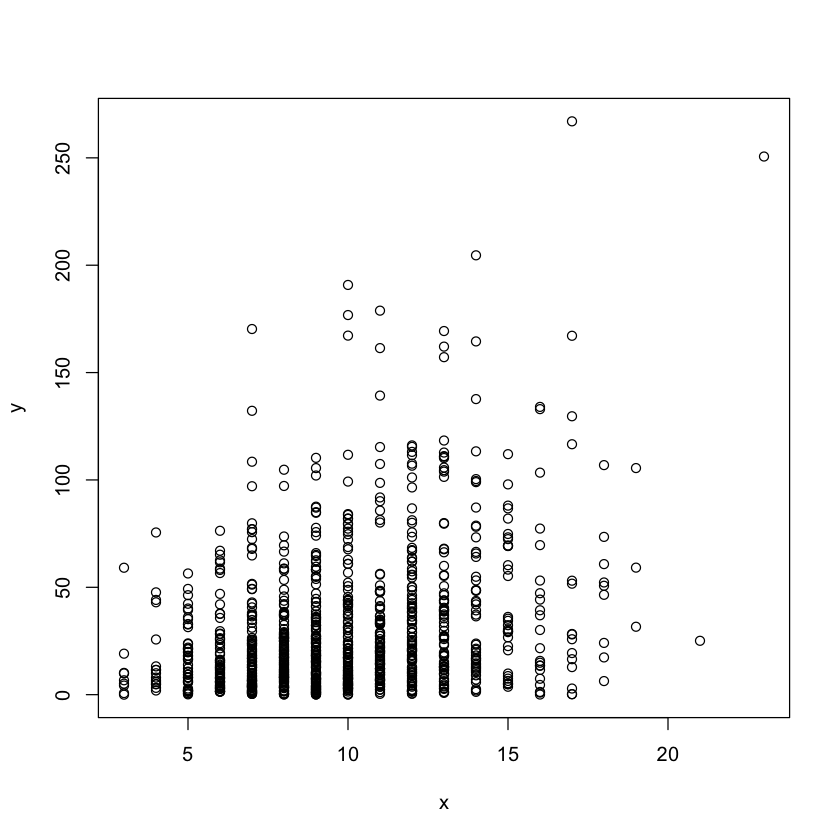

In [32]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 2:1000){
    y[i] <- rexp(1,1/(2 +  3*x[i]))
}

plot(x,y)

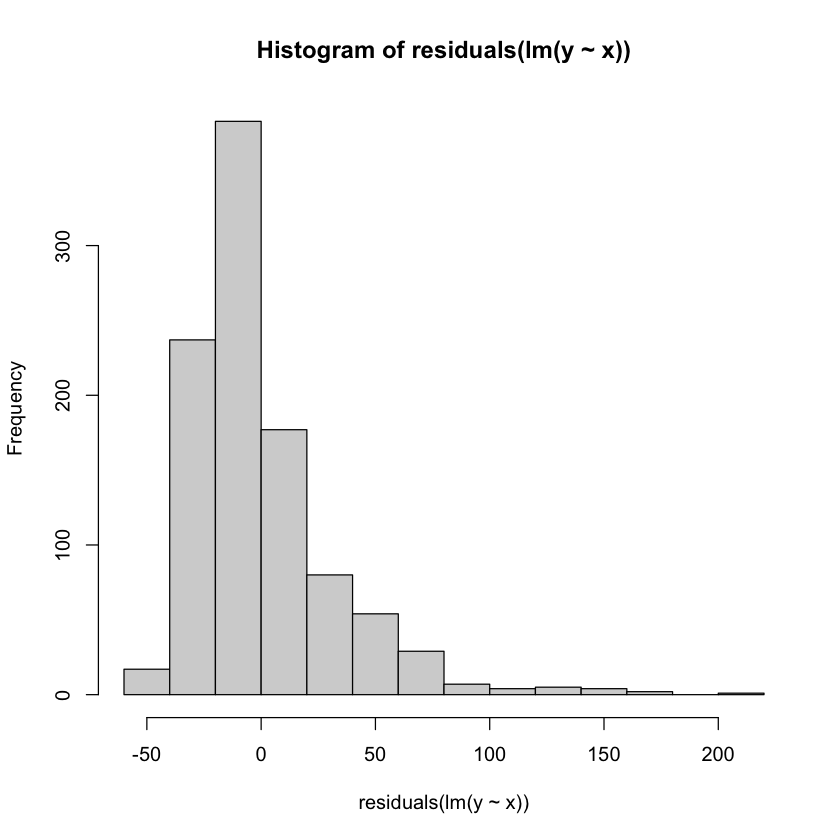

In [33]:
hist(residuals(lm(y~x)))


# Leverage


*Definition* An x value that is far away from the mean of x. 

This is important for identifying influential observations, and deciding whether there is some reason for their ability to influence or "leverage" the results. 


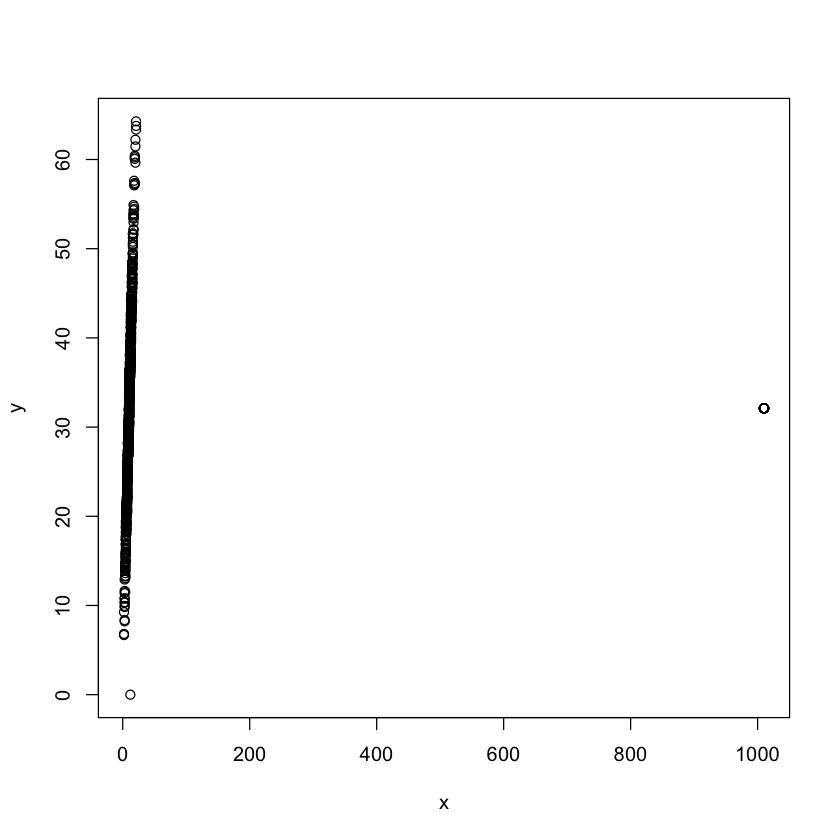

In [47]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 2:1000){
    y[i] <- rnorm(1,2+3*x[i])
}

y <- c(y,rep(mean(y),100))
x <- c(x,rep(mean(x)+1000,100))

plot(x,y)

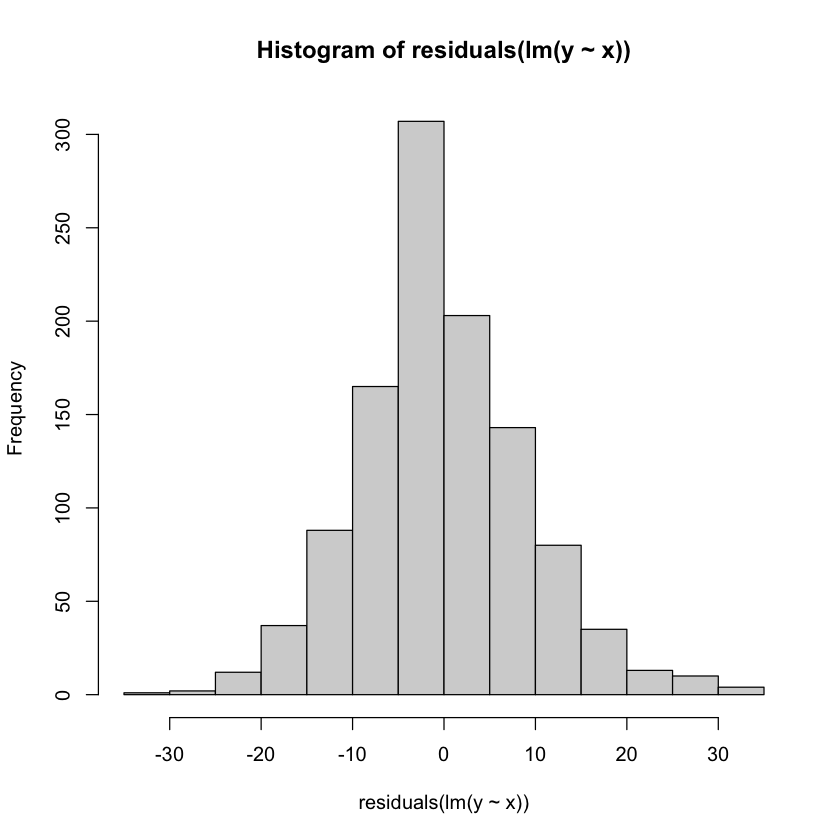

In [48]:
hist(residuals(lm(y~x)))


# Real data example


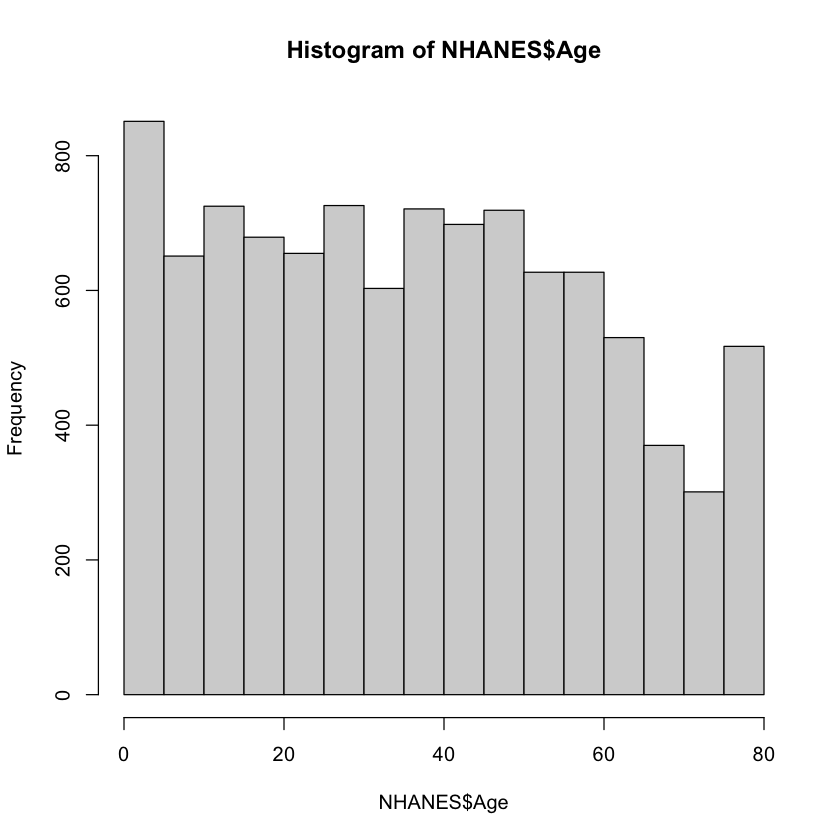

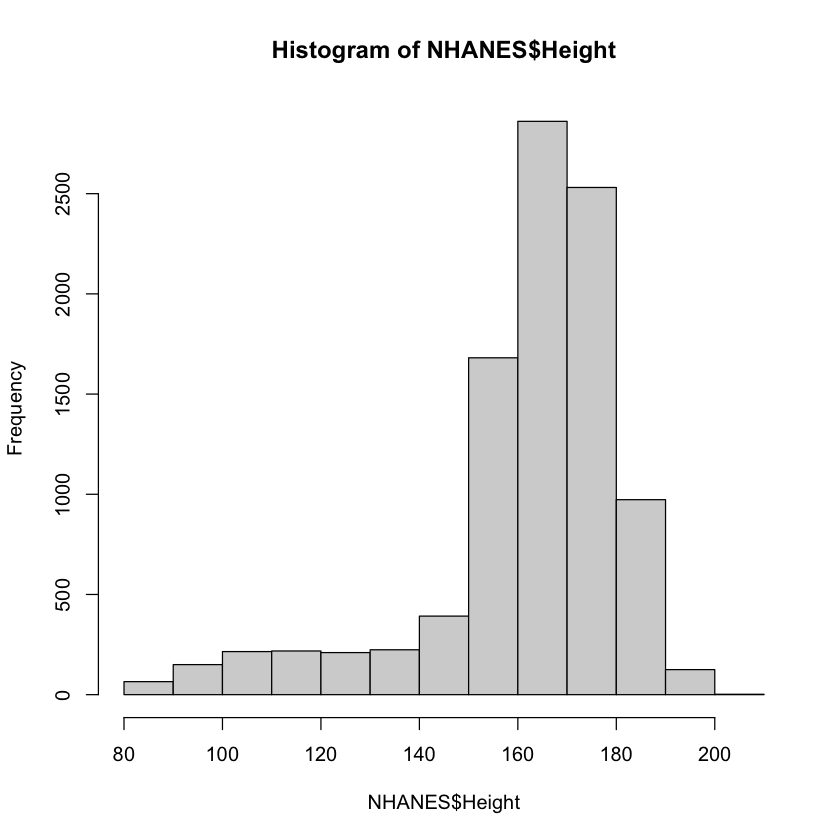

In [55]:
library(NHANES)

hist(NHANES$Age)
hist(NHANES$Height)

In [59]:
fit <- lm(BMI ~ Age,data=NHANES)

In [60]:
summary(fit)


Call:
lm(formula = BMI ~ Age, data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.794  -4.803  -1.236   3.466  55.697 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.451688   0.137193  156.36   <2e-16 ***
Age          0.138033   0.003148   43.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.735 on 9632 degrees of freedom
  (366 observations deleted due to missingness)
Multiple R-squared:  0.1664,	Adjusted R-squared:  0.1663 
F-statistic:  1922 on 1 and 9632 DF,  p-value: < 2.2e-16


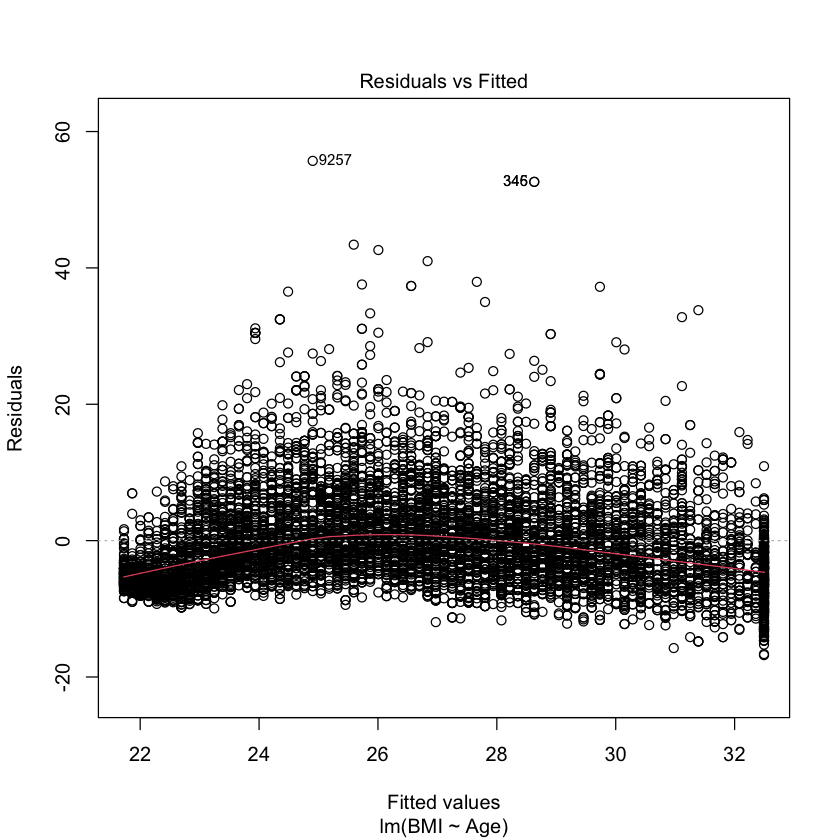

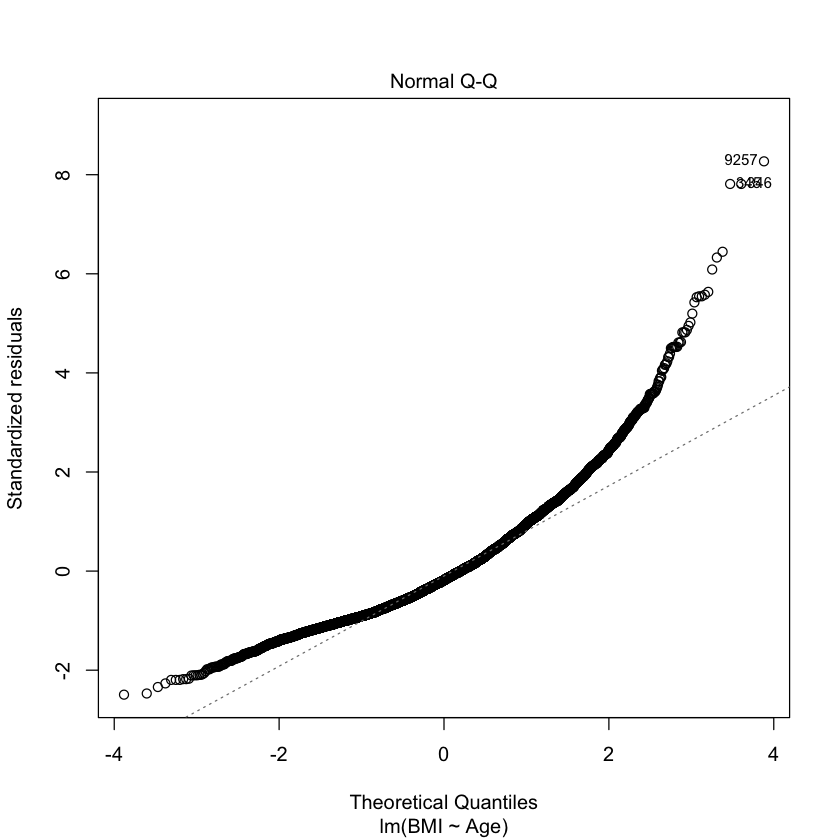

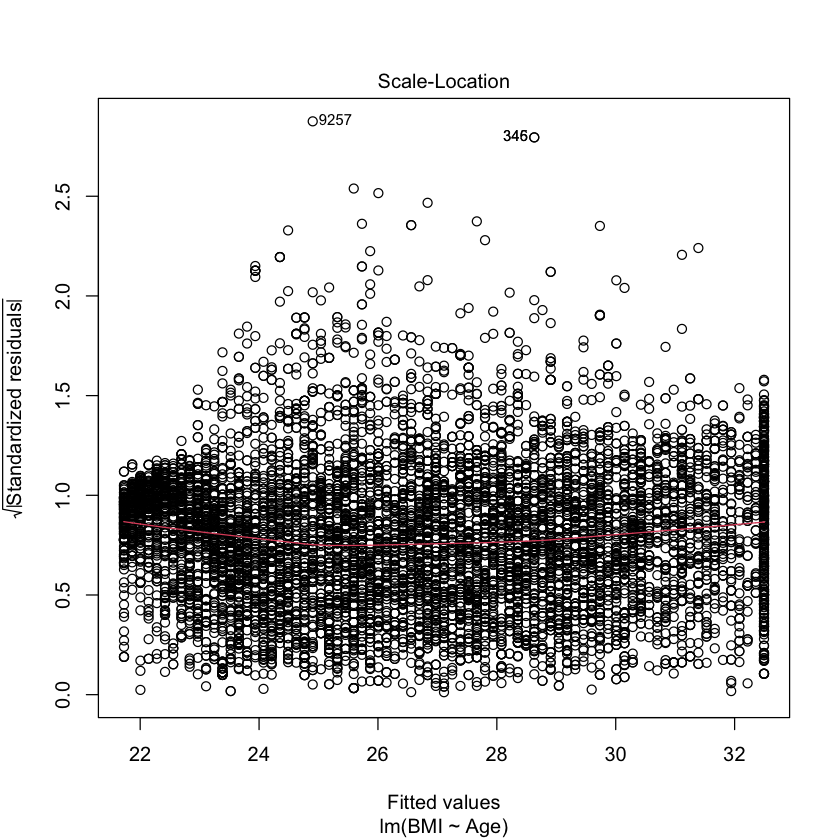

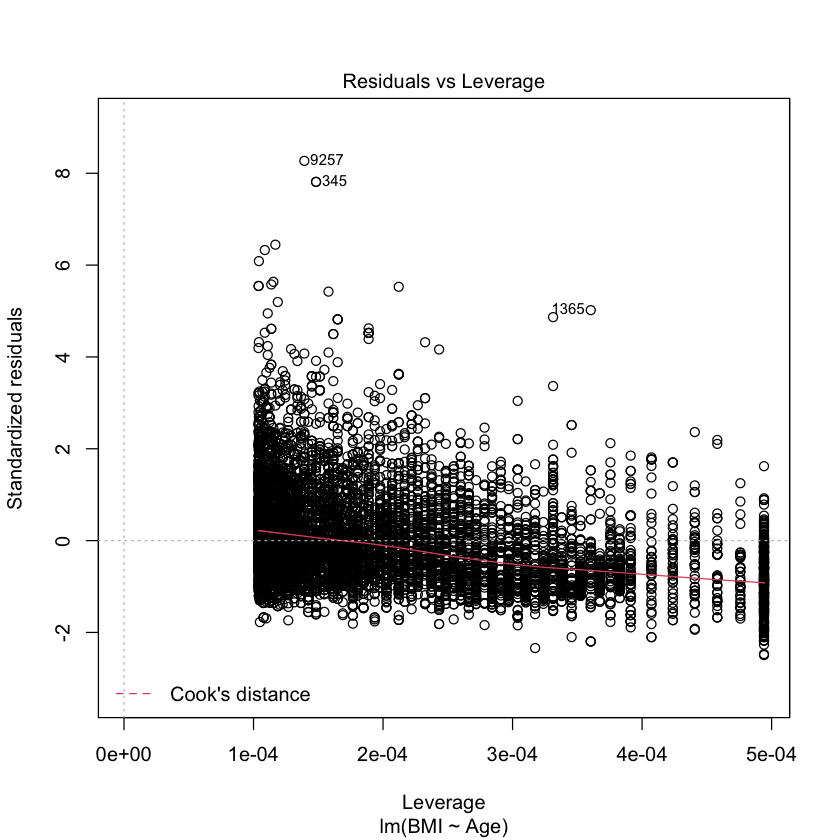

In [61]:
plot(fit)

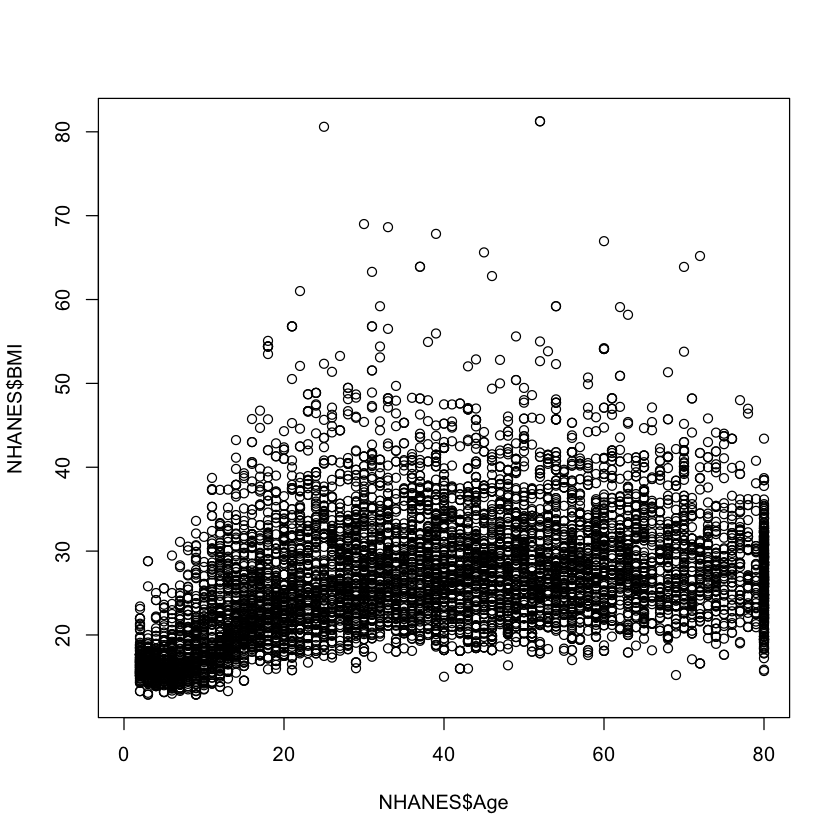

In [62]:
plot(NHANES$Age,NHANES$BMI)